In [145]:
# let's try using linear regression to predict the label using the irregularity score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time


# visualize using pairplot
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


In [146]:
# load the results
pan_tompkins_results = pd.read_csv('results/mit_bih_pan_tompkins_features.csv')
pan_tompkins_results = pan_tompkins_results.dropna()
print('results shape:', pan_tompkins_results.shape)
display(pan_tompkins_results.head())


results shape: (500, 33)


,rr_mean,rr_std,rmssd,rr_kurtosis,lower_tail,upper_tail,vlf_power,lf_power,hf_power,lf_hf_ratio,...,rr_coefficient,pq_interval,qrs_duration,st_interval,p_p_interval_mean,p_p_interval_std,qt_interval,total_beat_duration,record_name,label
0,0.822500,0.024071,0.822852,-0.555288,0.791389,0.863194,-0.008877,-0.034654,-0.003860,8.978540,...,0.029265,0.145960,0.048485,0.186111,0.822778,0.036616,0.329293,0.526768,0,N
1,0.807828,0.026612,0.808267,-0.818772,0.772222,0.851389,0.013665,0.081028,-0.014626,-5.539863,...,0.032943,0.125758,0.047727,0.219697,0.803056,0.041135,0.319444,0.501768,1,N
2,0.817424,0.027704,0.817894,-0.245645,0.783333,0.862500,0.001605,0.070813,-0.002994,-23.654986,...,0.033892,0.133611,0.047778,0.075833,0.820062,0.045110,0.168611,0.356111,2,N
3,0.818611,0.019287,0.818838,-1.027679,0.786111,0.839167,-0.066794,0.112243,-0.024540,-4.573786,...,0.023561,0.131061,0.049242,0.135859,0.814167,0.041767,0.256061,0.440909,3,N
4,0.807071,0.024742,0.807450,-0.737682,0.783333,0.851389,0.002343,-0.042719,0.019480,-2.192978,...,0.030657,0.139899,0.048232,0.098232,0.810833,0.034749,0.196465,0.387879,4,N


In [155]:

print(pan_tompkins_results['label'].value_counts())

# remove nan values
# pan_tompkins_results = pan_tompkins_results.dropna()

# Convert string arrays to numeric values if needed
# for column in pan_tompkins_results.columns:
#     if pan_tompkins_results[column].dtype == 'object':
#         # If the column contains string representations of arrays, convert them
#         try:
#             pan_tompkins_results[column] = pan_tompkins_results[column].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ').mean() if isinstance(x, str) else x)
#         except:
#             print(f"Warning: Could not convert column {column}")

# split the data into train and test
y = pan_tompkins_results['label']
X = pan_tompkins_results.drop(['label', 'record_name'], axis=1)

# second_order_rr_interval is an array, let's just remove it
X = X.drop(columns=['second_order_rr_intervals'])
feature_names = X.columns
print(feature_names)

# normalize the data
scaler = StandardScaler()
print(X.shape)
#check if there any non-numeric values
print(X.applymap(np.isreal).all())
X = scaler.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# lets print the columns
#display(X_train[:5])


label
N    100
S    100
V    100
F    100
Q    100
Name: count, dtype: int64
Index(['rr_mean', 'rr_std', 'rmssd', 'rr_kurtosis', 'lower_tail', 'upper_tail',
       'vlf_power', 'lf_power', 'hf_power', 'lf_hf_ratio',
       'second_order_rr_mean', 'second_order_rr_std', 'hr_mean', 'hr_std',
       'min_hr', 'max_hr', 'pnn50', 'signal_power', 'signal_energy',
       'signal_entropy', 'irregularity_mean', 'irregularity_std',
       'rr_coefficient', 'pq_interval', 'qrs_duration', 'st_interval',
       'p_p_interval_mean', 'p_p_interval_std', 'qt_interval',
       'total_beat_duration'],
      dtype='object')
(500, 30)
rr_mean                 True
rr_std                  True
rmssd                   True
rr_kurtosis             True
lower_tail              True
upper_tail              True
vlf_power               True
lf_power                True
hf_power                True
lf_hf_ratio             True
second_order_rr_mean    True
second_order_rr_std     True
hr_mean                 True


/var/folders/3v/t7p60tvs5773q0xm_4_bb2tr0000gn/T/ipykernel_6854/1977390354.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(X.applymap(np.isreal).all())


In [156]:
pca = PCA()
X_pca = pca.fit_transform(X)

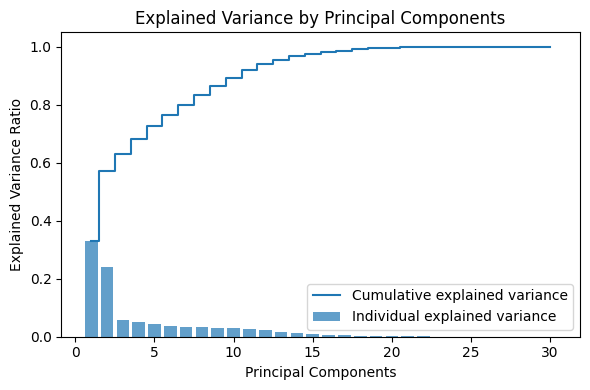

In [157]:
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [159]:
import pandas as pd
import numpy as np

# Assuming `X` is a DataFrame with feature names
features = pan_tompkins_results.drop(columns=['label', 'record_name', 'second_order_rr_intervals']).columns 
components = pca.components_  # Principal component loadings

# Create a DataFrame to visualize the components and their feature contributions
loading_df = pd.DataFrame(components, columns=features, index=[f'PC{i+1}' for i in range(components.shape[0])])

# Display the most important features for each component
most_important_features = {}
for pc in loading_df.index:
    most_important_features[pc] = loading_df.loc[pc].abs().nlargest(3).index.tolist()  # Top 3 features by absolute value

# Show the most important features overall
most_important_features = loading_df.abs().sum().sort_values(ascending=False).index.tolist()
display(most_important_features,)


['qrs_duration',
 'total_beat_duration',
 'min_hr',
 'hr_std',
 'p_p_interval_mean',
 'second_order_rr_std',
 'st_interval',
 'pq_interval',
 'max_hr',
 'lower_tail',
 'qt_interval',
 'rr_kurtosis',
 'hr_mean',
 'irregularity_mean',
 'rr_mean',
 'rr_coefficient',
 'upper_tail',
 'irregularity_std',
 'rr_std',
 'signal_entropy',
 'p_p_interval_std',
 'second_order_rr_mean',
 'vlf_power',
 'signal_energy',
 'signal_power',
 'pnn50',
 'rmssd',
 'lf_power',
 'hf_power',
 'lf_hf_ratio']

### We can use the results to remove less important features during training.

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest model
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X)

# setup train and test using PCA data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

start_time = time.time()
rf = RandomForestClassifier(random_state=42)
# Fit the model
rf.fit(X_train, y_train)
# Predict the target variable
y_pred_rf = rf.predict(X_test)
# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Calculate the runtime
runtime_rf = time.time() - start_time
# Get the top predictor
top_predictor_rf = feature_names[np.argmax(rf.feature_importances_)]
# Append the results
result_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Train Accuracy': [rf.score(X_train, y_train)],
    'Test Accuracy': [accuracy_rf],
    'Runtime': [runtime_rf],
    'Top Predictor': [top_predictor_rf]
})
print(result_rf)


           Model  Train Accuracy  Test Accuracy   Runtime Top Predictor
0  Random Forest             1.0           0.95  0.098472       rr_mean


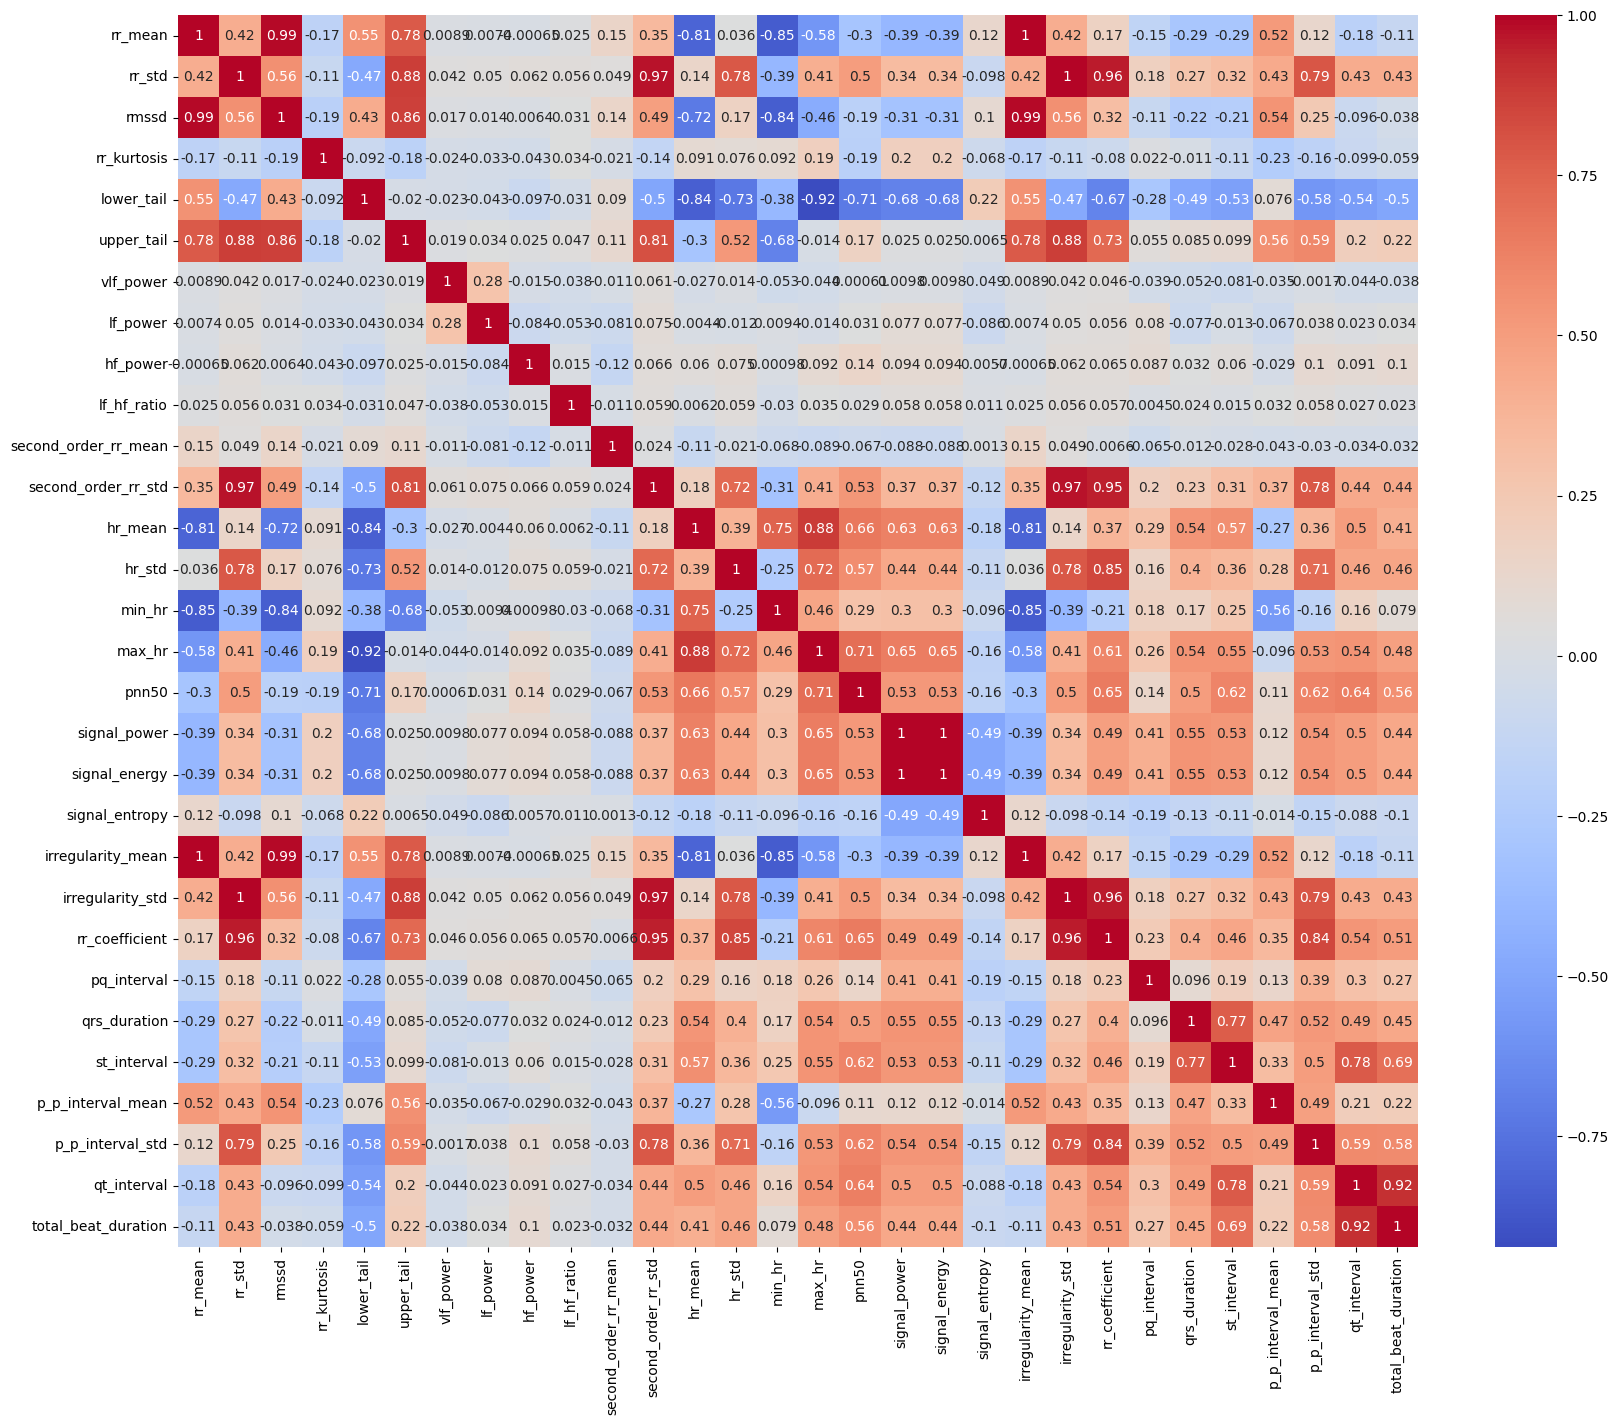

In [164]:
plt.figure(figsize=(20, 16))
sns.heatmap(pd.DataFrame(pan_tompkins_results.drop(
  columns=['record_name', 'second_order_rr_intervals', 'label'])).corr(), 
  annot=True, cmap='coolwarm')
plt.show()


     hr_std    hr_mean     min_hr     max_hr  lower_tail  upper_tail label
0  1.452200  73.010033  71.077571  75.526938    0.791389    0.863194     N
1  1.659414  74.352996  71.954054  77.240257    0.772222    0.851389     N
2  1.529590  73.484102  70.715692  75.541275    0.783333    0.862500     N
3  1.396067  73.336234  71.842644  75.710978    0.786111    0.839167     N
4  1.510633  74.411258  71.307505  76.415307    0.783333    0.851389     N


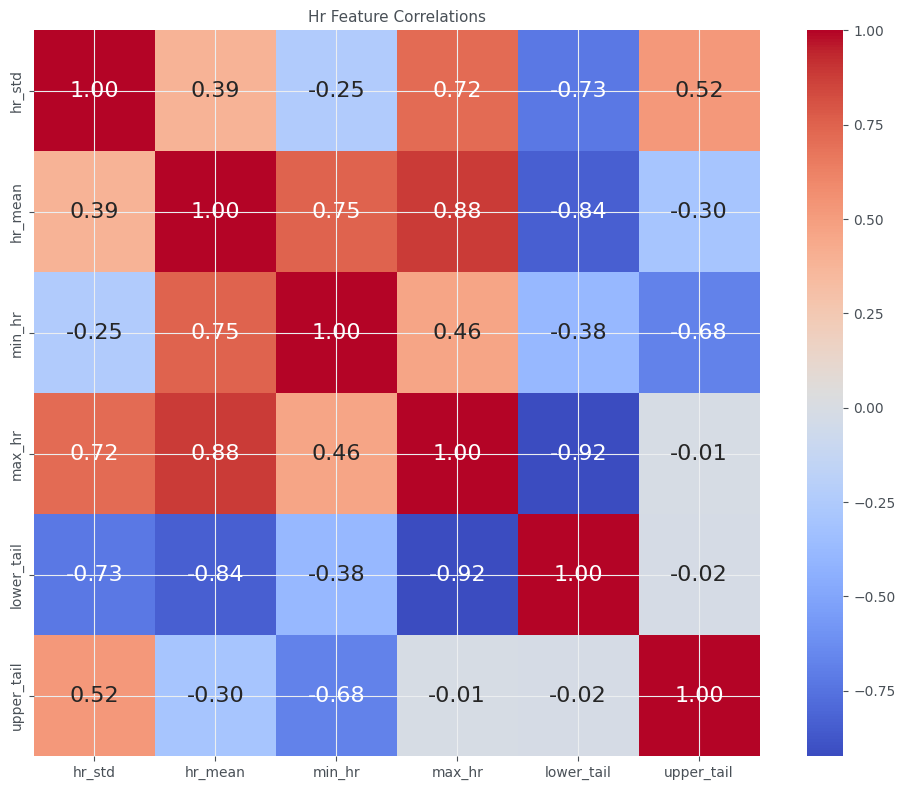

     rr_std     rmssd  pnn50  rr_kurtosis label
0  0.024071  0.822852    0.0    -0.555288     N
1  0.026612  0.808267    0.0    -0.818772     N
2  0.027704  0.817894    0.0    -0.245645     N
3  0.019287  0.818838    0.0    -1.027679     N
4  0.024742  0.807450    0.0    -0.737682     N


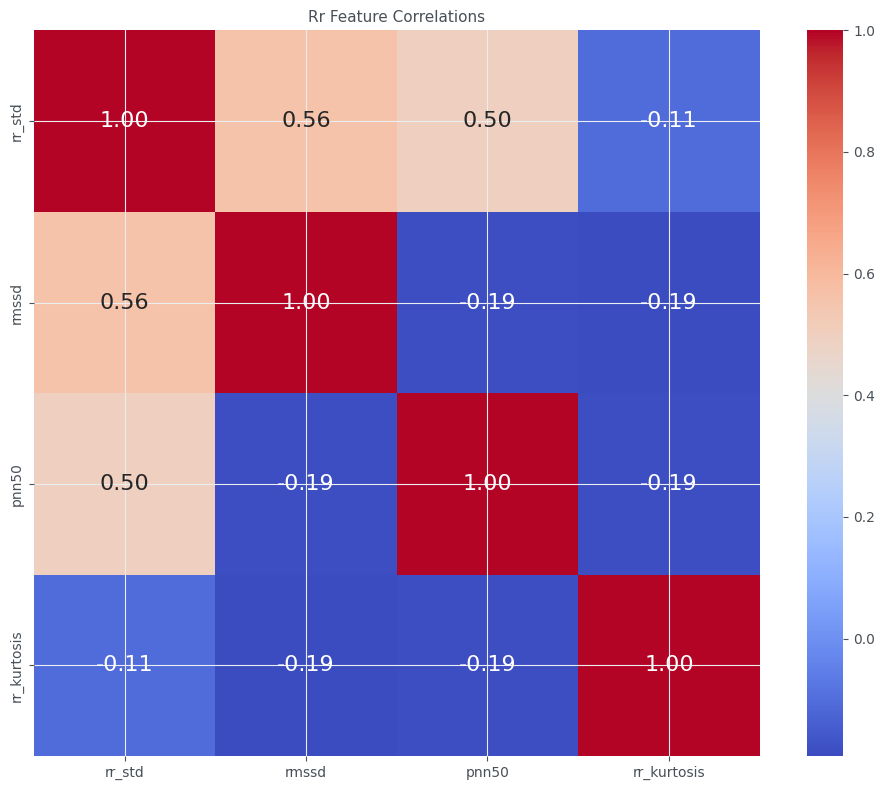

   signal_power  signal_entropy  signal_energy label
0      0.026539       99.150559      95.539894     N
1      0.029455      102.776724     106.037148     N
2      0.028101      104.383197     101.162915     N
3      0.029801      102.381878     107.282641     N
4      0.026088      106.753001      93.916590     N


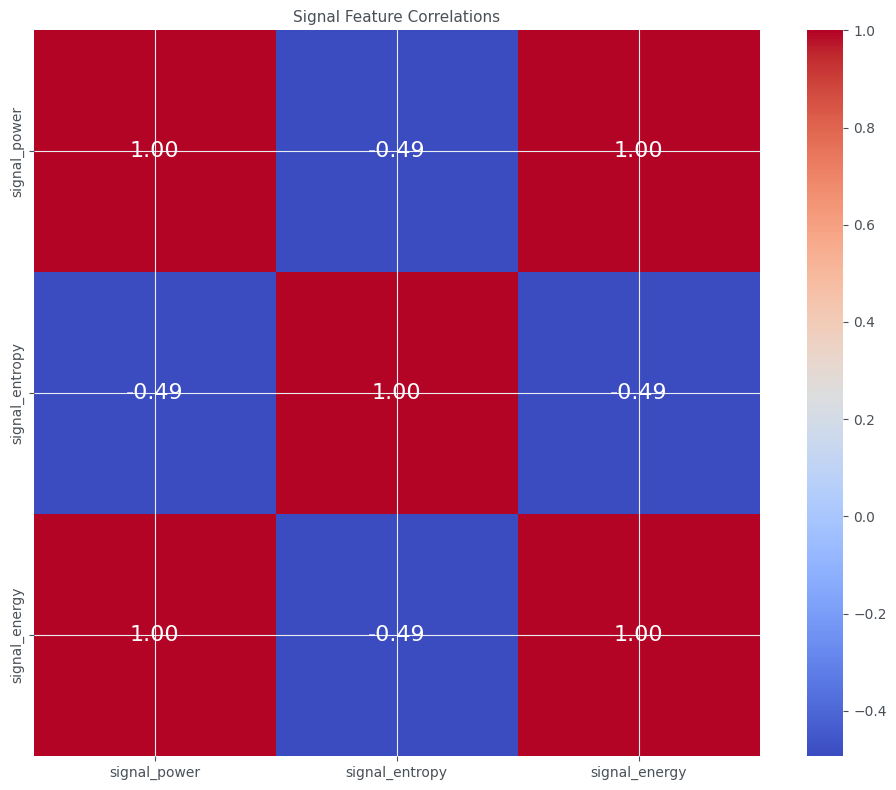

   vlf_power  lf_power  hf_power  lf_hf_ratio label
0  -0.008877 -0.034654 -0.003860     8.978540     N
1   0.013665  0.081028 -0.014626    -5.539863     N
2   0.001605  0.070813 -0.002994   -23.654986     N
3  -0.066794  0.112243 -0.024540    -4.573786     N
4   0.002343 -0.042719  0.019480    -2.192978     N


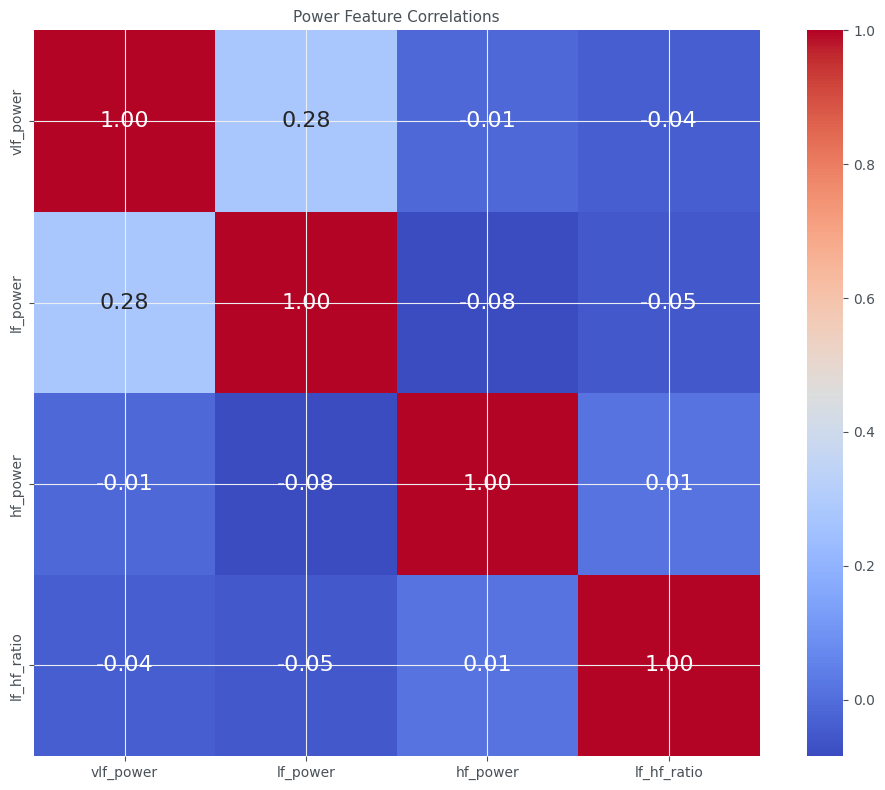

   irregularity_mean  irregularity_std  rr_coefficient label
0           0.822500          0.024071        0.029265     N
1           0.807828          0.026612        0.032943     N
2           0.817424          0.027704        0.033892     N
3           0.818611          0.019287        0.023561     N
4           0.807071          0.024742        0.030657     N


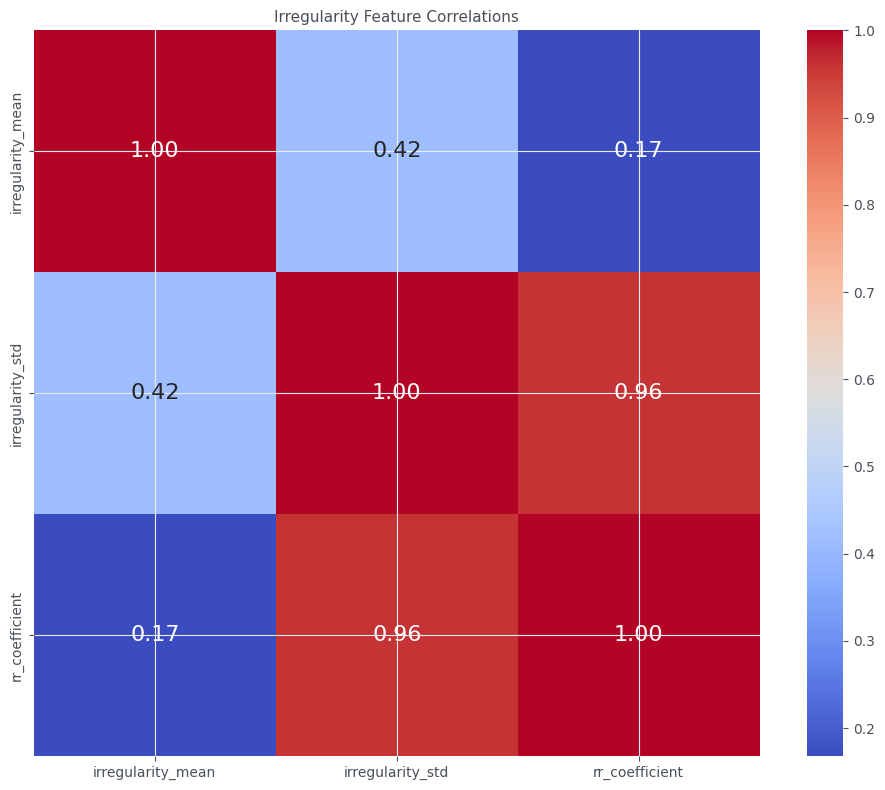

   pq_interval  qrs_duration  st_interval  p_p_interval_mean  \
0     0.145960      0.048485     0.186111           0.822778   
1     0.125758      0.047727     0.219697           0.803056   
2     0.133611      0.047778     0.075833           0.820062   
3     0.131061      0.049242     0.135859           0.814167   
4     0.139899      0.048232     0.098232           0.810833   

   p_p_interval_std  qt_interval  total_beat_duration label  
0          0.036616     0.329293             0.526768     N  
1          0.041135     0.319444             0.501768     N  
2          0.045110     0.168611             0.356111     N  
3          0.041767     0.256061             0.440909     N  
4          0.034749     0.196465             0.387879     N  


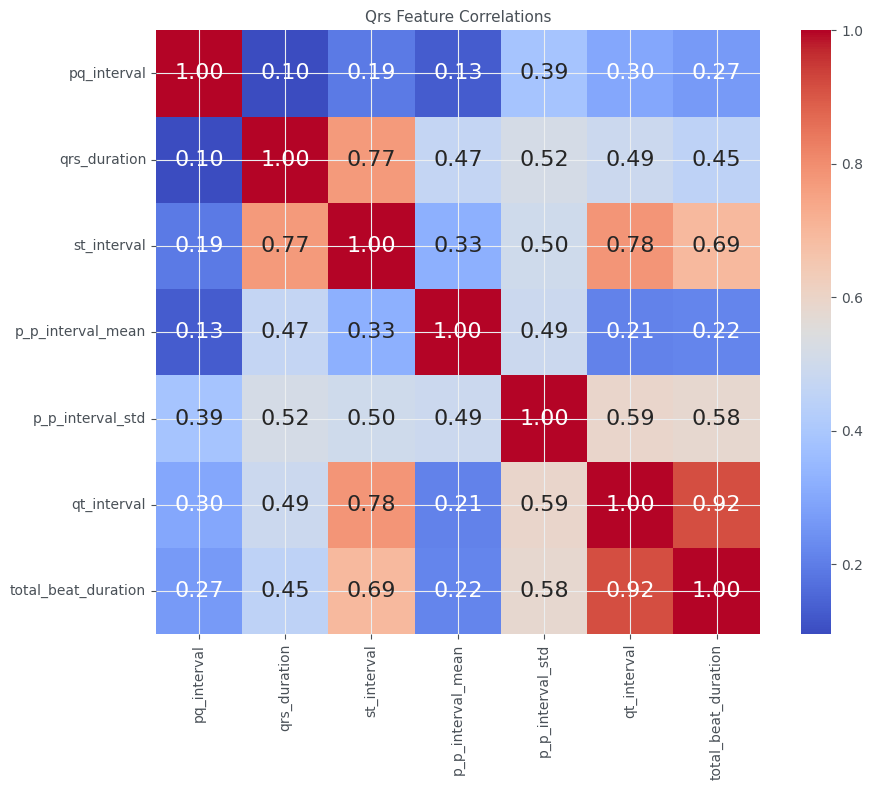

   second_order_rr_mean  second_order_rr_std label
0             -0.003704             0.028927     N
1              0.008611             0.030032     N
2             -0.002222             0.034444     N
3             -0.000617             0.017112     N
4              0.001389             0.027978     N


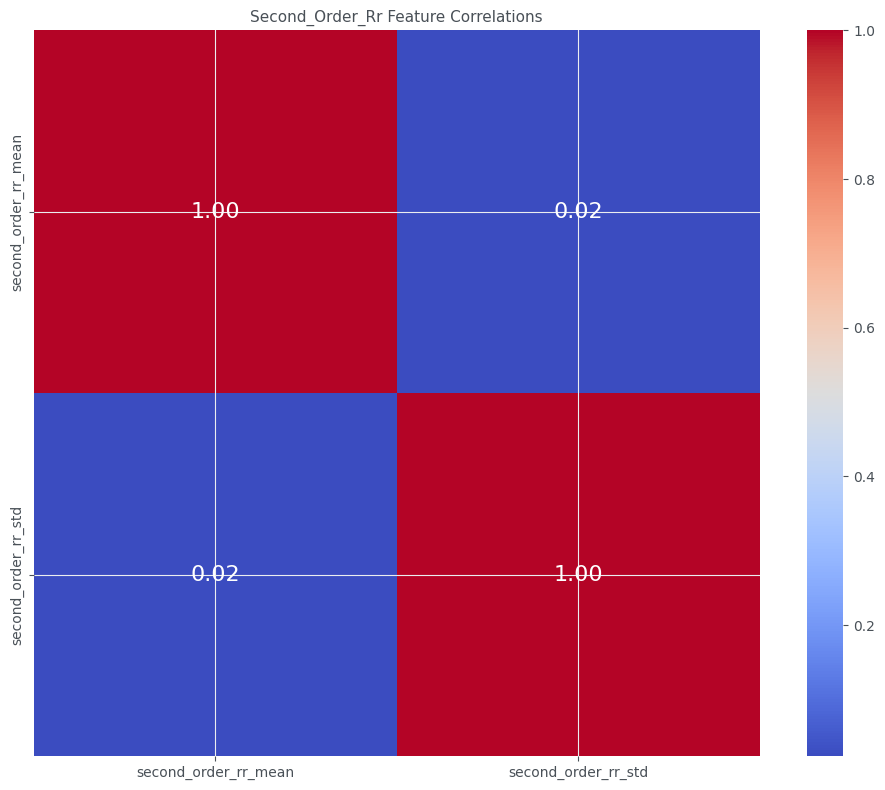

In [218]:

feature_groups = {
    'hr': ['hr_std', 'hr_mean', 'min_hr', 'max_hr', 'lower_tail', 'upper_tail', 'label'],
    'rr': ['rr_std', 'rmssd', 'pnn50', 'rr_kurtosis', 'label'],
    'signal': ['signal_power', 'signal_entropy',  'signal_energy', 'label'],
    'power': ['vlf_power', 'lf_power', 'hf_power', 'lf_hf_ratio', 'label'],
    'irregularity': ['irregularity_mean', 'irregularity_std', 'rr_coefficient', 'label'],
    'qrs': ['pq_interval', 'qrs_duration', 'st_interval', 'p_p_interval_mean', 'p_p_interval_std', 'qt_interval', 'total_beat_duration', 'label'],
    'second_order_rr': ['second_order_rr_mean', 'second_order_rr_std', 'label']
}


# Create and plot pairplots for each feature group
for group_name, features in feature_groups.items():
    df_subset = pan_tompkins_results[features].copy()

    # Ensure label column is properly formatted
    df_subset['label'] = df_subset['label'].astype(str)
    print(df_subset.head())

    plt.figure(figsize=(10, 8))  # Adjust size for better readability
    sns.heatmap(df_subset.drop(columns=['label']).corr(), 
                annot=True,
                fmt='.2f',  # Round to 2 decimal places
                cmap='coolwarm',
                square=True,  # Make cells square
                annot_kws={'size': 16})  # Adjust annotation text size
    plt.title(f'{group_name.title()} Feature Correlations')
    plt.tight_layout()
    plt.show()
    
    # g = sns.pairplot(df_subset, 
    #                  hue='label', 
    #                  diag_kind='kde',
    #                  palette={'N': 'green', 'Q': 'red', 'S': 'blue', 'V': 'purple', 'F': 'orange'},
    #                  plot_kws={'alpha': 0.6})
    # g.fig.suptitle(f'{group_name.replace("_", " ").title()} Relationships', y=1.02)
    # plt.show()


In [216]:
pan_tompkins_results.columns

Index(['rr_mean', 'rr_std', 'rmssd', 'rr_kurtosis', 'lower_tail', 'upper_tail',
       'vlf_power', 'lf_power', 'hf_power', 'lf_hf_ratio',
       'second_order_rr_intervals', 'second_order_rr_mean',
       'second_order_rr_std', 'hr_mean', 'hr_std', 'min_hr', 'max_hr', 'pnn50',
       'signal_power', 'signal_energy', 'signal_entropy', 'irregularity_mean',
       'irregularity_std', 'rr_coefficient', 'pq_interval', 'qrs_duration',
       'st_interval', 'p_p_interval_mean', 'p_p_interval_std', 'qt_interval',
       'total_beat_duration', 'record_name', 'label'],
      dtype='object')

In [ ]:
def analyze_rr_intervals(record_name, 
                         data_path, 
                         labels_df, 
                         zscore=False, 
                         low_cut=0, 
                         high_cut=0, 
                         height=0,
                         prominence=0,
                         distance=0.6,
                         plot=False):
    # Read the record
    record = wfdb.rdrecord(f'{data_path}/{record_name}')
    signals = record.p_signal.flatten()
    sampling_rate = record.fs 

    # preprocess the signal
    if zscore:
        signals = zscore(signals)

    if low_cut and high_cut:
        signals = bandpass_filter(signals, lowcut=low_cut, highcut=high_cut, fs=sampling_rate)

    label = labels_df[labels_df.record_name == record_name].label.values[0]
    
    # Compute RR intervals and metrics
    rr_metrics = compute_rr_intervals(signals, 
                                      sampling_rate=sampling_rate, 
                                      height=height, 
                                      prominence=prominence, 
                                      distance=distance)
    
    if plot:
        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
        
        # Plot original signal with R peaks
        ax1.plot(signals)
        r_peaks = rr_metrics['r_peaks']
        ax1.plot(r_peaks, signals[r_peaks], "x")
        ax1.set_title(f'ECG Signal with R Peaks - Record {record_name} (Class: {label})')
        ax1.grid(True)
        
        # Plot RR intervals
        ax2.plot(rr_metrics['rr_intervals'])
        ax2.set_title(f'RR Intervals (Mean: {rr_metrics["mean_rr"]:.3f}, Std: {rr_metrics["std_rr"]:.3f})')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()
    
    return {
        'record_id': record_name,
        'label': label,
        'mean_rr': rr_metrics['mean_rr'],
        'std_rr': rr_metrics['std_rr'],
        'rmssd': rr_metrics['rmssd']
    }

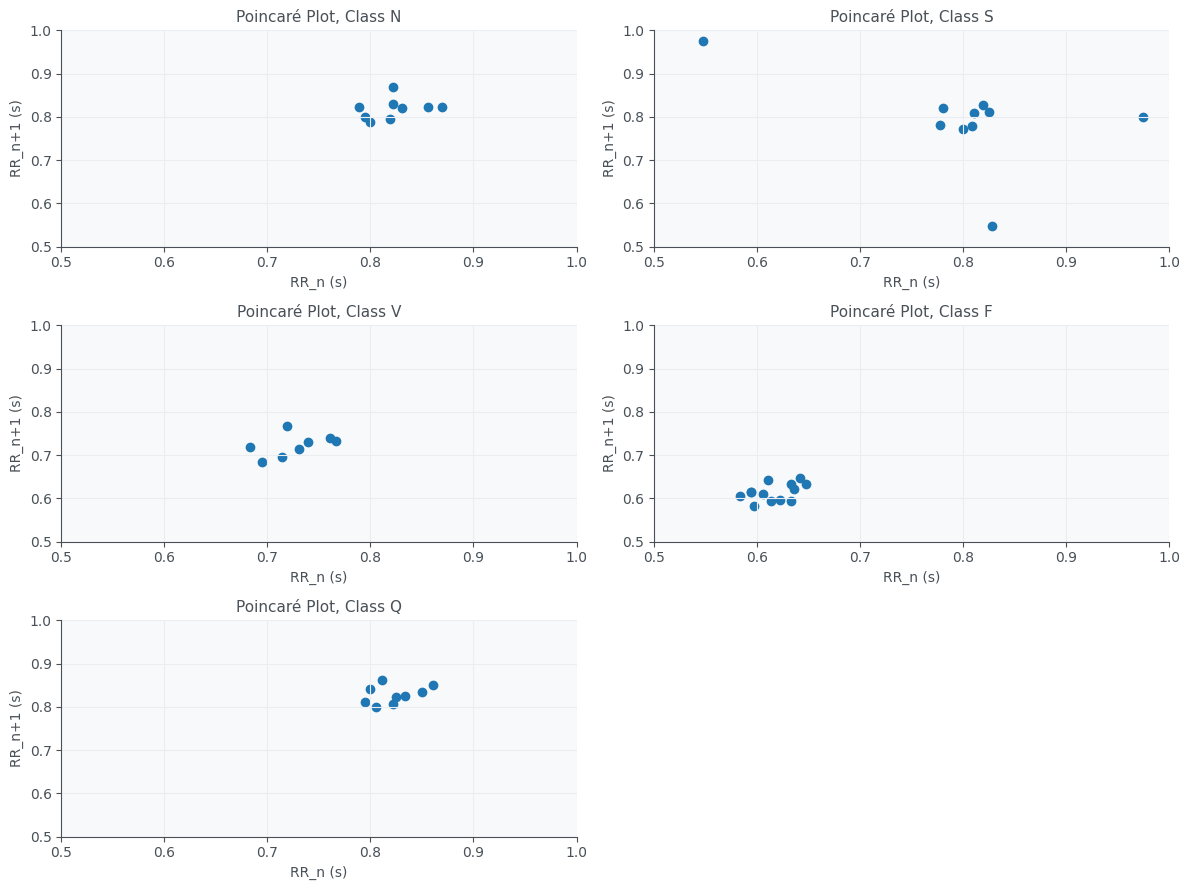

In [206]:
from biosppy.signals import ecg

# poincare plot
df = pd.read_csv('data/mit-bih/compiled_mit_bih.csv')
all_signals = df.drop(columns=['label']).values

record_ids = [0, 102, 202, 300, 405]

n_rows = (len(record_ids) + 1) // 2
plt.figure(figsize=(12, 3*n_rows))

for i, record_id in enumerate(record_ids):
    ecg_signal = all_signals[record_id]
    out = ecg.ecg(signal=ecg_signal, sampling_rate=360, show=False)
    rr_peaks = out['rpeaks']
    rr_intervals = np.diff(rr_peaks) / 360
    plt.subplot(n_rows, 2, i+1)
     # Plot 3: Poincaré plot
    plt.scatter(rr_intervals[:-1], rr_intervals[1:])
    plt.xlabel('RR_n (s)')
    plt.ylabel('RR_n+1 (s)')
    plt.title(f'Poincaré Plot, Class {df.loc[record_id, "label"]}')
    # fix the range of the plot
    plt.xlim(0.5, 1.)
    plt.ylim(0.5, 1.)
    plt.grid(True)
plt.tight_layout()
plt.show()
